In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ACV Project")

In [ ]:
!pwd

/content/drive/My Drive/ACV Project


**Dataset Description**
- This aligned dataset contains **10.770** images for **100** people. All images are taken from 'Pinterest' and aligned using dlib library

**Extracting ZIPFILE**

In [ ]:
from zipfile import ZipFile
with ZipFile('Dataset Aligned Face Dataset from Pinterest.zip', 'r') as zipObj:
   zipObj.extractall()

In [ ]:
import os
os.listdir("PINS")

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

Defining a Function To Load Images

In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        print(base, name, file)
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
    def to_dict(self):
        return {
            'base': self.base,
            'name': self.name,
            'file': self.file,
        }
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')


Streaming output truncated to the last 5000 lines.
PINS pins_Sophie Turner Sophie Turner57_1691.jpg
PINS pins_Sophie Turner Sophie Turner58_1668.jpg
PINS pins_Sophie Turner Sophie Turner59_1653.jpg
PINS pins_Sophie Turner Sophie Turner5_1638.jpg
PINS pins_Sophie Turner Sophie Turner60_1650.jpg
PINS pins_Sophie Turner Sophie Turner61_1725.jpg
PINS pins_Sophie Turner Sophie Turner62_1698.jpg
PINS pins_Sophie Turner Sophie Turner64_1722.jpg
PINS pins_Sophie Turner Sophie Turner65_1682.jpg
PINS pins_Sophie Turner Sophie Turner66_1688.jpg
PINS pins_Sophie Turner Sophie Turner68_1651.jpg
PINS pins_Sophie Turner Sophie Turner69_1662.jpg
PINS pins_Sophie Turner Sophie Turner70_1642.jpg
PINS pins_Sophie Turner Sophie Turner71_1751.jpg
PINS pins_Sophie Turner Sophie Turner72_1726.jpg
PINS pins_Sophie Turner Sophie Turner73_1738.jpg
PINS pins_Sophie Turner Sophie Turner74_1694.jpg
PINS pins_Sophie Turner Sophie Turner74_1695.jpg
PINS pins_Sophie Turner Sophie Turner76_1743.jpg
PINS pins_Sophie Tu

Loading Images From The MetaData

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

Loading A Sample Image

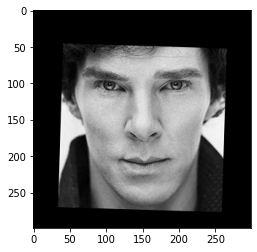

In [ ]:
from matplotlib import pyplot
%matplotlib inline
image = load_image("PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch44.jpg")
pyplot.imshow(image)

VGG Face Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

Loading The Model

In [ ]:
model = vgg_face()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Generating Embeddings For Each Image in The Dataset

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [ ]:
from tqdm import tqdm

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in tqdm(enumerate(metadata)):
    img = load_image(m.image_path())
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    # obtain embedding vector for image
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

10770it [28:24,  6.32it/s]


**Defining Distance Function** 
- to calculate distance between given 2 pairs of images.
- Considering distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

**Plotting images and getting distance between the pairs**

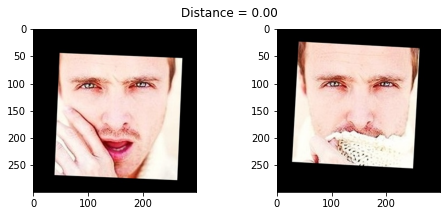

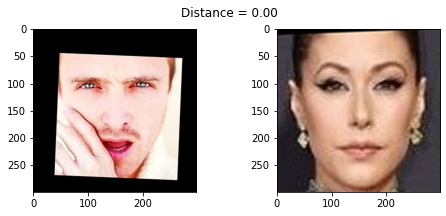

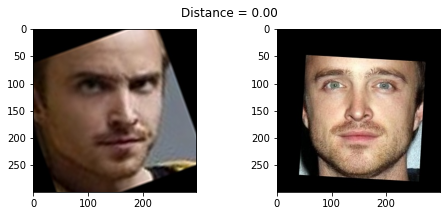

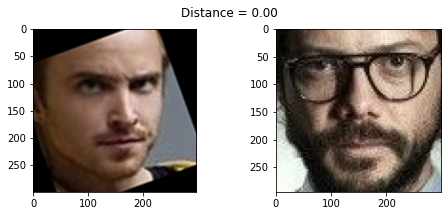

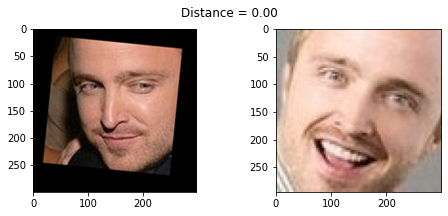

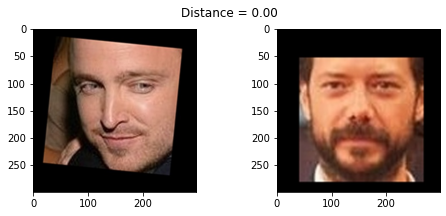

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair (30,31)
show_pair (30,100)
show_pair (70,72)
show_pair (70,115)

**Train and Test Sets**
- Using train_idx to separate training features from labels
- Using test_idx to seperate testing features from labels

In [ ]:
print(metadata[0].name)
print(metadata[0].file)
print(metadata[0].base)
print(metadata[0].image_path())

pins_Aaron Paul
Aaron Paul0_262.jpg
PINS
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


In [ ]:
metadata.shape

(10770,)

In [ ]:
np.shape(embeddings)

(10770, 2622)

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

##Splitting into training and test set
import pandas as pd

metadata_panda = pd.DataFrame.from_records([m.to_dict() for m in metadata])
metadata_panda.head(10)


,base,name,file
0,PINS,pins_Aaron Paul,Aaron Paul0_262.jpg
1,PINS,pins_Aaron Paul,Aaron Paul101_247.jpg
2,PINS,pins_Aaron Paul,Aaron Paul101_248.jpg
3,PINS,pins_Aaron Paul,Aaron Paul101_249.jpg
4,PINS,pins_Aaron Paul,Aaron Paul103_217.jpg
5,PINS,pins_Aaron Paul,Aaron Paul113_228.jpg
6,PINS,pins_Aaron Paul,Aaron Paul114_271.jpg
7,PINS,pins_Aaron Paul,Aaron Paul116_240.jpg
8,PINS,pins_Aaron Paul,Aaron Paul117_213.jpg
9,PINS,pins_Aaron Paul,Aaron Paul119_219.jpg


In [ ]:
metadata_panda.shape

(10770, 3)

In [ ]:
y_labels = metadata_panda.name
X = embeddings

**Encoding the Labels**

In [ ]:
# splitting will be done post encoding
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y_labels)
list(lb.classes_)

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [ ]:
y = lb.transform(y_labels)
print (y)


[ 0  0  0 ... 99 99 99]


In [ ]:
y.shape


(10770,)

**Standardization Of Feature Values**

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
print(scaler.mean_)

[ 6.16593815e-05  1.13813538e-04  2.45406095e-04 ... -3.59757382e-04
  6.53190231e-06  1.14367390e-05]


In [ ]:
X_Scale = scaler.transform(X)

In [ ]:
X_Scale.shape

(10770, 2622)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(X_Scale.shape[1])]
X_Scale_PD = pd.DataFrame(X_Scale,columns=feat_cols)
X_Scale_PD.tail(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature2582,feature2583,feature2584,feature2585,feature2586,feature2587,feature2588,feature2589,feature2590,feature2591,feature2592,feature2593,feature2594,feature2595,feature2596,feature2597,feature2598,feature2599,feature2600,feature2601,feature2602,feature2603,feature2604,feature2605,feature2606,feature2607,feature2608,feature2609,feature2610,feature2611,feature2612,feature2613,feature2614,feature2615,feature2616,feature2617,feature2618,feature2619,feature2620,feature2621
10760,-0.766691,1.665989,-1.870341,0.545657,0.812169,-0.871504,-0.223947,-0.219953,1.272020,-0.477178,1.316927,1.362514,2.135028,0.209935,0.375158,-0.720804,0.982885,-0.081946,1.057999,0.373206,0.303140,-0.370587,-1.539560,0.370998,-0.178192,2.782086,-0.652723,0.218389,-0.889780,-0.626349,0.260897,-0.387983,-0.181172,-1.067501,0.233611,0.298264,-1.621272,0.045490,1.650143,-0.709780,...,-0.154396,0.127283,-1.480912,0.260621,0.279788,-0.022350,-0.145796,0.082294,0.976998,1.297381,-0.222881,0.665183,-0.262577,-0.191544,-0.593673,0.296714,3.119029,-0.234355,-0.821504,-0.006448,-0.503691,0.924029,-0.841882,0.260202,-0.409512,0.809613,0.599195,0.280900,0.072485,-0.780404,-0.334900,-1.196957,-1.176053,-1.018405,1.499154,-0.819471,-0.727316,1.191385,1.549749,-0.270242
10761,1.506198,1.197076,-0.641114,-0.824573,0.381749,0.796990,1.092463,0.876792,0.730523,-0.872936,1.053215,-0.102019,0.973731,0.363042,-0.036252,0.494526,0.373239,0.823450,-0.020568,-0.627224,0.758641,-0.995660,0.660966,-1.367448,0.950734,-0.874881,-0.379272,-0.826310,-0.608958,0.246859,0.341878,-1.401312,-1.147165,-0.990545,0.941819,-2.084086,0.713555,0.046388,-0.393553,0.184739,...,-1.035142,-0.407461,0.849619,-0.500024,-0.240195,0.829736,2.284879,0.358637,-0.995472,-1.173127,1.556810,-0.486932,0.169178,0.657592,-0.540371,0.480422,0.242429,-0.679052,-0.057926,0.316553,-1.078714,0.270085,0.053625,-0.187031,0.716936,0.837656,-2.376690,0.171717,-2.071086,0.726202,1.101988,-0.620618,-1.287066,1.430250,2.202757,-1.062276,1.823562,0.802274,-0.404249,-1.220006
10762,1.044631,-1.287442,-0.561815,-0.294842,0.421829,0.186902,0.316460,0.476099,-0.286449,-0.437273,0.449683,0.622937,0.645589,-0.864659,-0.001569,-0.934660,0.818232,-0.184231,1.079317,0.162985,0.113479,0.119107,-0.839634,0.477127,-0.315346,0.644988,0.399974,1.028776,0.473274,-0.098649,-0.821782,0.559524,0.199783,0.024709,-0.107706,0.681269,1.690459,0.560784,0.179267,-0.695051,...,1.331455,0.798541,-0.436610,0.326633,-0.614156,-1.251461,-1.069574,0.646980,0.627542,0.489204,0.461531,-0.864916,-0.577882,0.359981,-1.142529,0.620157,0.914935,1.052629,-0.840384,0.143535,-0.593234,0.132433,-1.092326,-1.085554,-0.398682,0.882877,0.617462,-0.645059,-0.957333,-1.809503,0.782500,0.418787,0.209789,-1.160723,0.109346,-0.234599,-0.044792,1.112459,-0.788419,0.858494
10763,-0.571146,0.015105,-1.281977,0.346152,0.224635,1.267875,1.698021,1.763231,1.324464,-0.807869,1.684220,-0.875909,1.041797,0.980576,-0.412007,-1.330855,0.765566,1.233831,-0.832744,0.568877,0.455898,-1.982427,-1.028108,-0.943915,0.751772,-0.069337,1.015351,-0.878239,-0.516160,0.500401,0.324714,-1.744330,-1.127427,-1.185619,1.159149,0.566855,-0.620200,0.895165,0.832585,0.665406,...,-1.447206,-0.268253,0.561061,-1.233702,-0.794589,-0.483448,-0.261594,1.888963,1.332712,-1.460270,0.342228,0.116760,-0.527399,0.782529,-0.675777,0.980493,0.896892,-0.599491,0.561096,0.856992,0.575921,0.755025,-0.230451,-0.993023,0.204334,1.280893,0.540303,1.434946,0.186250,-1.153104,1.321604,0.053109,-1.547163,1.558024,0.537159,-0.088656,0.371363,0.879037,1.278904,0.616279
10764,-1.050804,0.001385,-0.868255,0.835969,0.744474,-0.00408

**Deminsionality Reduction Using PCA**

In [ ]:
from sklearn.decomposition import PCA

pca_20 = PCA(n_components=20, whiten=True, svd_solver='full')
X_Scale_PCA20 = pca_20.fit_transform(X_Scale)

print(pca_20.explained_variance_ratio_)

[0.29754575 0.12377384 0.11105417 0.04920394 0.03277625 0.02417839
 0.01823196 0.01735752 0.01412293 0.01314937 0.01187336 0.00985781
 0.00850106 0.00812107 0.00713656 0.00634062 0.00601778 0.00519063
 0.0046702  0.00448581]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scale_PCA20, y, test_size=0.10, random_state=1)


**Building SVC Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
classifier = SVC()
classifier = classifier.fit(X_train,y_train)
print(classifier.get_params)

pred_train = classifier.predict(X_train)

Best estimator found by grid search:
<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


In [ ]:
classifier.score(X_train, y_train)

0.39430516867842774

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[13  0  1 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 [ 0  0 47 ...  0  1  2]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  1  2 ...  0 34  0]
 [ 0  0  2 ...  0  0 46]]


In [ ]:
pred_test = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.14856081708449395

In [ ]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
from sklearn import metrics
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.17      0.11      0.13         9
           2       0.38      0.44      0.41        18
           3       0.27      0.21      0.24        14
           4       0.17      0.17      0.17         6
           5       0.00      0.00      0.00         4
           6       0.30      0.33      0.32         9
           7       0.14      0.20      0.16        15
           8       0.19      0.25      0.21        12
           9       0.00      0.00      0.00        10
          10       0.12      0.11      0.12         9
          11       0.10      0.06      0.07        17
          12       0.21      0.38      0.27         8
          13       0.00      0.00      0.00        11
          14       0.05      0.09      0.06        11
          15       0.08      0.14      0.10        14
          16       0.15      0.33      0.21         6
          1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Test results**

In [ ]:
X_test.shape

(1077, 20)

In [ ]:
pred_test[10]

20

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 11

example_prediction = classifier.predict(X_test[example_idx].reshape(1,-1))
print(example_prediction)

[36]


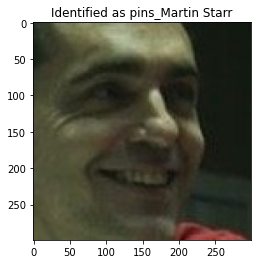

In [ ]:
metadata_train, metadata_test, y_train, y_test = train_test_split(metadata, y, test_size=0.10, random_state=1)
example_image = load_image(metadata_test[example_idx].image_path())

example_identity = lb.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');